# Область работы 1 (библиотеки)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

# Область работы 2 (выбор модели)

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_A.csv'# содержит только имя файла, без имен папок !!!

In [3]:
df = pd.read_csv(path_train)
df.head()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']), df['price'])

kbest = SelectKBest(f_regression, k=14)
kbest.fit(X_train, y_train)
kbest.get_feature_names_out()

array(['0', '4', '6', '7', '9', '12', '13', '16', '20', '21', '22', '24',
       '25', '28'], dtype=object)

In [6]:
fwe = SelectFwe(f_regression, alpha = 0.5)
fwe.fit(X_train, y_train)
fwe.get_feature_names_out()

array(['0', '4', '5', '6', '7', '8', '9', '12', '13', '16', '20', '21',
       '22', '23', '24', '25', '28'], dtype=object)

In [7]:
kbest = SelectKBest(f_regression, k=7)

kbest.fit(X_train, y_train)


kbest.get_feature_names_out()

array(['4', '6', '7', '12', '13', '16', '21'], dtype=object)

In [8]:
columns = ['0', '4', '5', '6', '7', '9', '12', '13', '16', '21',
       '22', '24', '25', '28']

In [9]:
X_train_sel = X_train.loc[:, columns]
X_test_sel = X_test.loc[:, columns]

In [10]:
def plot_2_error(y_true, y_pred):
    
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Scatter Plot')
    plt.title('Scatter Plot of Predicted vs. True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    
   
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prediction Line')
    
    
    plt.legend()
    print(f'MAPE: {mape:.2f}%')
    
    
    plt.show()

In [11]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', RandomForestRegressor())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

param_grid = {
    'model__regressor__estimator__n_estimators': [40],
    'model__regressor__estimator__criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'model__regressor__estimator__max_depth': [None,4, 8, 10],
    'model__regressor__estimator__min_samples_split': [3, 5, 9, 10],
    'model__regressor__estimator__min_samples_leaf': [1, 2, 4],
    'model__transformer': [PowerTransformer(), QuantileTransformer()] 
}


grid_t = GridSearchCV(model, param_grid, n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error')
grid_t.fit(X_train_sel, y_train)
grid_t
grid_result = pd.DataFrame(grid_t.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (245). n_quantiles is set to n_samples.
  warnings.warn(
/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py

,105,148,114,108,156,150,184,182,183,113,...,219,227,230,41,221,231,225,47,239,35
mean_fit_time,0.443934,0.32781,0.424448,0.405849,0.31589,0.303023,0.309605,0.326453,0.295105,0.37598,...,0.10617,0.165926,0.130507,0.114111,0.129262,0.12642,0.156386,0.105491,0.119661,0.092938
std_fit_time,0.059686,0.007341,0.012389,0.07798,0.009479,0.009337,0.007995,0.031129,0.006441,0.038987,...,0.004563,0.007992,0.002385,0.005981,0.003356,0.006297,0.006119,0.00212,0.002211,0.000856
mean_score_time,0.012293,0.009215,0.019439,0.024927,0.010211,0.010403,0.01018,0.00994,0.009835,0.013218,...,0.009639,0.016594,0.010791,0.009512,0.012445,0.009744,0.017439,0.009146,0.011369,0.008547
std_score_time,0.005103,0.000925,0.003597,0.01152,0.001534,0.001806,0.000909,0.000431,0.001142,0.003321,...,0.00086,0.004308,0.002076,0.000865,0.00282,0.001982,0.006779,0.000368,0.002011,0.000773
param_model__regressor__estimator__criterion,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,...,friedman_mse,friedman_mse,friedman_mse,squared_error,friedman_mse,friedman_mse,friedman_mse,squared_error,friedman_mse,squared_error
param_model__regressor__estimator__max_depth,None,8,None,None,8,8,10,10,10,None,...,4,4,4,4,4,4,4,4,4,4
param_model__regressor__estimator__min_samples_leaf,2,1,4,2,2,1,4,2,2,4,...,1,2,2,4,1,2,2,4,4,2
param_model__regressor__estimator__min_samples_split,3,9,5,9,9,10,3,10,10,3,...,5,5,10,3,9,10,3,10,10,5
param_model__regressor__estimator__n_estimators,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
param_model__transformer,QuantileTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer(),...,QuantileTransformer(),QuantileTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer()


MAPE: 14.83%


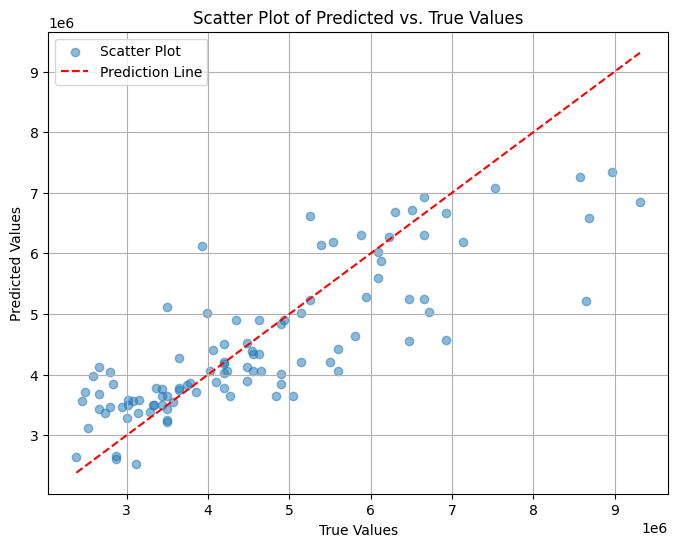

In [12]:
plot_2_error(y_test, grid_t.best_estimator_.predict(X_test_sel))

In [13]:
grid_t.best_params_

{'model__regressor__estimator__criterion': 'absolute_error',
 'model__regressor__estimator__max_depth': None,
 'model__regressor__estimator__min_samples_leaf': 2,
 'model__regressor__estimator__min_samples_split': 3,
 'model__regressor__estimator__n_estimators': 40,
 'model__transformer': QuantileTransformer()}